Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [189]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [190]:
sal_data = pd.read_csv('Salary_Data.csv')
sal_data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Exploratory Data Analysis

In [191]:
print(sal_data.shape)
print(sal_data.isnull().sum())
print(sal_data.dtypes)
sal_data.describe(include='all')

(30, 2)
YearsExperience    0
Salary             0
dtype: int64
YearsExperience    float64
Salary             float64
dtype: object


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

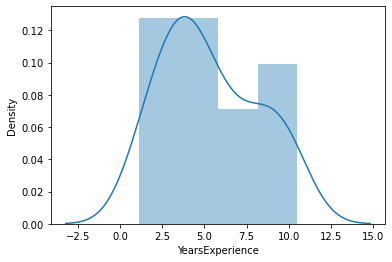

In [192]:
sns.distplot(sal_data.YearsExperience)

{'whiskers': [<matplotlib.lines.Line2D at 0x21a7c181a90>,
 'caps': [<matplotlib.lines.Line2D at 0x21a7ab0c1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a7c1814f0>],
 'medians': [<matplotlib.lines.Line2D at 0x21a7ac9b1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a7ac9b5e0>],
 'means': []}

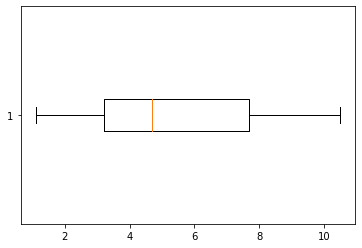

In [193]:
plt.boxplot(sal_data.YearsExperience, vert = False)

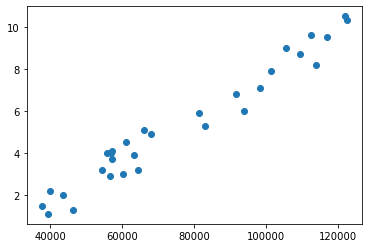

In [194]:
#shows positive correlation between salary and years of experience
plt.scatter(sal_data.Salary,sal_data.YearsExperience)

In [195]:
# correlation strength is high 97% between salary and years of experience
sal_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [202]:
x_input = sal_data[['YearsExperience']]
y_output = sal_data[['Salary']]

## Model Building and Training

### Without K-fold validation

In [203]:
# linear regression using stats model
import statsmodels.formula.api as smf
model_stats = smf.ols('Salary ~ YearsExperience', data=sal_data ).fit()
print(model_stats.params)
#print(model_stats.summary())

#Linear Regression from sklearn
le_model = LinearRegression()
le_model.fit(x_input,y_output)

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64


LinearRegression()

### With k-fold validation

In [204]:
cv_score_le = cross_val_score(estimator=le_model, X=x_input, y=y_output, cv=3)
print("CV score is for LR model = {}\n mean accuracy = {}\n std dev  = {}".
      format(cv_score_le,cv_score_le.mean(),cv_score_le.std()))

cv_score_dt = cross_val_score(estimator=dt_model, X=x_input, y=y_output, cv=3)
print("CV score is for DT model = {}\n mean accuracy = {}\n std dev  = {}".
      format(cv_score_dt,cv_score_dt.mean(),cv_score_dt.std()))

cv_score_rf = cross_val_score(estimator=rf_model, X=x_input, y=y_output, cv=3)
print("CV score is for RF model = {}\n mean accuracy = {}\n std dev  = {}".
      format(cv_score_rf,cv_score_rf.mean(),cv_score_rf.std()))

cv_score_ab = cross_val_score(estimator=ab_model, X=x_input, y=y_output, cv=3)
print("CV score is for AB Model = {}\n mean accuracy = {}\n std dev  = {}".
      format(cv_score_ab,cv_score_ab.mean(),cv_score_ab.std()))

cv_score_gb = cross_val_score(estimator=gb_model, X=x_input, y=y_output, cv=3)
print("CV score is for GB model = {}\n mean accuracy = {}\n std dev  = {}".
      format(cv_score_gb,cv_score_gb.mean(),cv_score_gb.std()))

CV score is for LR model = [0.42772573 0.63293326 0.71542639]
 mean accuracy = 0.5920284587713647
 std dev  = 0.12096230568610448
CV score is for DT model = [-2.06939332  0.71755849 -2.57725106]
 mean accuracy = -1.3096952959812134
 std dev  = 1.4484010255931623
CV score is for RF model = [-1.37342426  0.79535673 -3.63114278]
 mean accuracy = -1.4030701031901087
 std dev  = 1.8072324411244711
CV score is for AB Model = [-1.46405274  0.77870182 -2.57725106]
 mean accuracy = -1.0875339917289824
 std dev  = 1.3956909176860555
CV score is for GB model = [-2.05314214  0.72568828 -2.60075113]
 mean accuracy = -1.3094016626612859
 std dev  = 1.4562880229673791


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

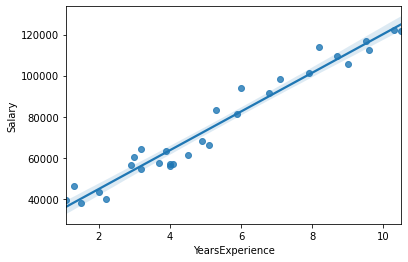

In [205]:
sns.regplot(x=sal_data.YearsExperience , y=sal_data.Salary)

## Model Prediction - Linear Regression

In [206]:
#for training data
predicted_sal_train      = le_model.predict(x_input)
#predicted_sal_train

final_data                     = pd.DataFrame()
final_data                     = x_input
final_data['Actual_salary']    = y_output
final_data['Predicted_salary'] = predicted_sal_train
print(final_data)

    YearsExperience  Actual_salary  Predicted_salary
0               1.1        39343.0      36187.158752
1               1.3        46205.0      38077.151217
2               1.5        37731.0      39967.143681
3               2.0        43525.0      44692.124842
4               2.2        39891.0      46582.117306
5               2.9        56642.0      53197.090931
6               3.0        60150.0      54142.087163
7               3.2        54445.0      56032.079627
8               3.2        64445.0      56032.079627
9               3.7        57189.0      60757.060788
10              3.9        63218.0      62647.053252
11              4.0        55794.0      63592.049484
12              4.0        56957.0      63592.049484
13              4.1        57081.0      64537.045717
14              4.5        61111.0      68317.030645
15              4.9        67938.0      72097.015574
16              5.1        66029.0      73987.008038
17              5.3        83088.0      75877.

In [207]:
# for test data
test_ds = pd.DataFrame({'YearsExperience': [0, 0.5, 1.1, 2.50, 3.2, 4.0, 4.7, 6, 7.0, 7.7, 8.9, 9, 10.5, 11, 12]})
predicted_sal_test = le_model.predict(test_ds)
predicted_sal_test_norm = le_model_norm.predict(test_ds)

predict_test_ds = pd.DataFrame({'YearsExperience': [0, 0.5, 1.1, 2.50, 3.2, 4.0, 4.7, 6, 7.0, 7.7, 8.9, 9, 10.5, 11, 12]})
predict_test_ds['Predict_sal_test'] = predicted_sal_test
print(predict_test_ds)

    YearsExperience  Predict_sal_test
0               0.0      25792.200199
1               0.5      30517.181359
2               1.1      36187.158752
3               2.5      49417.106002
4               3.2      56032.079627
5               4.0      63592.049484
6               4.7      70207.023110
7               6.0      82491.974127
8               7.0      91941.936449
9               7.7      98556.910074
10              8.9     109896.864860
11              9.0     110841.861092
12             10.5     125016.804574
13             11.0     129741.785735
14             12.0     139191.748056


### Evaluation Metrics - Linear Regression

In [208]:
# for training data
print("REGRESSOR MODEL")
print("MSE      = ",round(mean_squared_error(y_output,predicted_sal_train),2))
print("R2 score =",round(r2_score(y_output,predicted_sal_train),2))
print("MAE      =",round(mean_absolute_error(y_output,predicted_sal_train),2))

REGRESSOR MODEL
MSE      =  31270951.72
R2 score = 0.96
MAE      = 4644.2


Inferences

Not used Test-train split here as no. of records is very less (21 rows) So if we do test-train split then while training the data the model may miss out some pattern which may be present in the test split

k-fold cross validation for test environment with differnt machine learning algorithm was done
The means accuracy was 59% for LR model and for rest of the models it was in negatives
Therefore, we will use only LR model coz it is giving better accuracy for test environment.

For training data
Linear regression model is giving 96% accuracy